In [8]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import qmc

c = 3e8 # Speed of Light

class Muon:
    def __init__(self, x, y, z, v, v_theta, v_phi):
        self.v_theta = v_theta
        self.v_phi = v_phi
        self.z_list = [z]
        self.v = v
        self.x_list = [x]
        self.y_list = [y]
        self.lifetime = 3

    def propagate(self, time_step):
        time = 0
        while time < self.lifetime:
            self.x_list.append(self.v * time_step * np.sin(self.v_phi) * np.cos(self.v_theta))
            self.y_list.append(self.v * time_step * np.sin(self.v_phi) * np.sin(self.v_theta))
            self.z_list.append(self.v * time_step * np.cos(self.v_phi))
            time += time_step

# Defines 3D regions where scintillation occurs.
class Scintillator:
    def __init__(self, r, z):
        self.r = r
        self.z = z

    def has_muon(self, muon):
        for i in range(muon.z_list):
            if self.z[0] <= muon.z_list[i] <= self.z[1] and np.sqrt(muon.x_list**2 + muon.y_list**2) <= self.r:
                return True
        return False

experiment = [Scintillator(1, [10,9]), Scintillator(1, [8,0])]

In [17]:
# returns random velocities to be used to build a muon class
def random_velocities(number):
    sampler = qmc.LatinHypercube(d = 1)
    sample = sampler.random(n = number)
    velocities = qmc.scale(sample,  0.9990, 0.9995)
    velocities *= c
    return velocities

def random_theta(number):
    sampler = qmc.LatinHypercube(d = 1)
    sample = sampler.random(n = number)
    thetas = qmc.scale(sample,  0, 2*np.pi)
    return thetas

def random_phi(number):
    sampler = qmc.LatinHypercube(d = 1)
    sample = sampler.random(n = number)
    phis = qmc.scale(sample,  0, np.pi)
    return phis

def random_r(number):
    sampler = qmc.LatinHypercube(d = 1)
    sample = sampler.random(n = number)
    return sample

def random_lifetime(number):
    sample = np.random.exponential(2.2e-9, number)
    # histogram demonstrates the expected distribution for a half-life count
    # plt.hist(sample)
    return sample

def random_muons(samples):
    rand_r = random_r(samples)
    rand_theta = random_theta(samples)
    rand_x = rand_r * np.sin(rand_theta)
    rand_y = rand_r * np.cos(rand_theta)
    rand_v = random_velocities(samples)
    rand_v_theta = random_theta(samples)
    rand_v_phi = random_phi(samples)
    muon_list = []
    for i in [0, samples-1]:
        muon_list.append(Muon(rand_x[i], rand_y[i], 1, rand_v[i], rand_v_theta[i], rand_v_phi[i]))
    return muon_list

array([2.24929925e-10, 1.12074419e-09, 1.55653039e-09, 6.81750963e-10,
       2.50935966e-09, 2.22938090e-09, 3.06368373e-09, 1.73631776e-10,
       2.71339877e-10, 1.78800715e-09, 2.17445631e-10, 2.45088270e-10,
       3.49969745e-09, 5.72923101e-10, 8.74121377e-10, 8.18830028e-09,
       1.24863123e-10, 8.03336130e-10, 5.40018875e-09, 2.47289797e-09,
       1.08573641e-09, 9.99380970e-09, 7.37797130e-09, 2.23276014e-10,
       3.77310937e-10, 7.84912520e-10, 2.73792369e-09, 8.09897940e-10,
       2.22608813e-09, 1.56538879e-09, 2.55586236e-09, 2.76237640e-09,
       4.06846876e-09, 5.64538071e-09, 2.70840659e-09, 3.15927758e-09,
       5.40179508e-09, 1.13245821e-09, 5.15062533e-09, 2.17106741e-09,
       3.86770276e-09, 3.25016313e-09, 8.56620688e-10, 8.10726803e-10,
       2.41210381e-09, 1.16292275e-09, 5.01796256e-09, 3.11206059e-10,
       3.77798504e-10, 8.98315155e-10, 3.94473965e-09, 1.16554476e-09,
       7.15016649e-10, 2.73731209e-09, 1.33083934e-08, 2.90747121e-10,
      

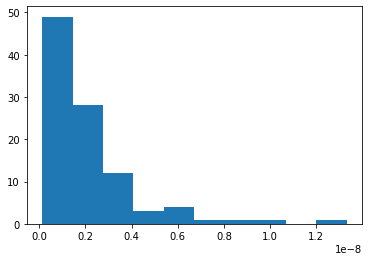

In [18]:
random_lifetime(100)